In [1]:
save_folder = '/home/jtauber/Documents/MillerData/analysis2/lfp/decode/figures'
save_figs = True

In [2]:
from pap.view import get_colors
from pap.utils import pickle_open
import neural_analysis as na

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.stats.multitest as mt

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.25)

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':'Arial'})

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [4]:
all_results_jones = pickle_open('jones_decode_lfp_flat_long.pickle')
all_results_mary = pickle_open('mary_decode_lfp_flat_long.pickle')

In [5]:
all_results = xr.concat([all_results_jones, all_results_mary], dim='session')

n_sids = all_results['session'].data.size

In [6]:
n_sids

21

In [7]:
areas_ord = ['CPB', '7b', 'FEF', 'vlPFC']
areas_ord.reverse()
area_conv = {'vlPFC': 'PFC',
              'FEF': '8A',
              'CPB': 'STG',
              '7b': 'PPC'}

area_locs = {'vlPFC': 0,
              'FEF': 1,
              'CPB': 3,
              '7b': 2}

phases = ['awake', 'drug2']

In [8]:
T = all_results.coords['timepts'].data.size
# x = np.linspace(-500, 1000, T)

n_timepts = all_results.timepts.size
# timepts = np.linspace(-500, 1000, n_timepts)
timepts = np.arange(-500, 2500, 20) / 1000

start_plot = -0.250
end_plot = 1
cut_s = np.where(timepts <= start_plot)[0][-1]

try:
    cut_e = np.where(timepts >= end_plot)[0][0]
except:
    cut_e = None

x = timepts[cut_s:cut_e]

T_new = x.size

In [9]:
n_timepts

150

In [10]:
all_results.coords

Coordinates:
  * cond     (cond) <U5 'awake' 'drug2'
  * area     (area) <U5 'CPB' '7b' 'FEF' 'vlPFC'
  * timepts  (timepts) float64 -0.5 -0.4799 -0.4597 ... 2.459 2.479 2.499
  * session  (session) object '0105' '0107' '0109' ... '0912' '0914' '0916'

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

vlPFC: 9.5367431640625e-07
FEF: 9.5367431640625e-07
7b: 9.5367431640625e-07
CPB: 9.5367431640625e-07


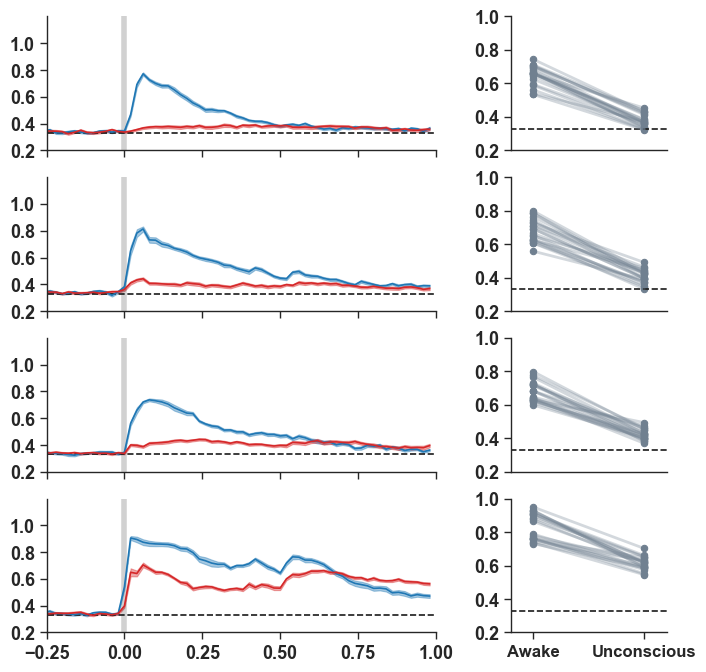

In [30]:

from matplotlib.lines import Line2D 
sns.set_context('paper', font_scale=1.5)

# c = 'po_cpt_t'
phases = ['awake', 'drug2']
fig, ax = plt.subplots(4, 3, figsize=(8, 8), sharex=False,sharey=False,
                      gridspec_kw={'width_ratios':[1,0.005, 0.4]})
# p_colors = ['tab:purple', 'tab:green', 'tab:cyan']

fwer = 0.01

ylims = [[0.2, 1.2],
         [0.2, 1.2],
         [0.2, 1.2],
         [0.2, 1.2]]

xticks = np.arange(-0.25, 1.25, 0.25)

yticks = np.arange(0.2, 1.2, 0.2)

for h, area in enumerate(areas_ord):
    j = 0
    i = area_locs[area]

    awake = all_results.loc[:,'awake',area,:][:,cut_s:cut_e]
    drug = all_results.loc[:,'drug2',area,:][:,cut_s:cut_e]

    awake_mean = awake.mean('session').data
    drug_mean = drug.mean('session').data

    awake_std = awake.std('session').data
    drug_std = drug.std('session').data

    awake_err = awake_std / np.sqrt(n_sids)
    drug_err = drug_std / np.sqrt(n_sids)

    a_col = 'tab:blue'
    d_col = 'tab:red'
    ax[i,j].plot(x, awake_mean, label='awake', color=a_col)
    ax[i,j].fill_between(x, awake_mean - awake_err, awake_mean + awake_err, color=a_col, alpha=0.4)
    ax[i,j].plot(x, drug_mean, label='propofol', color=d_col)
    ax[i,j].fill_between(x, drug_mean - drug_err, drug_mean + drug_err, color=d_col, alpha=0.4)


    # chance = 0.33
    # # stats Awake / Chance
    # wilcox_results = np.zeros(T_new)
    # for t in range(T_new):
    #     awake_t = awake[:,t]
    #     s, pval = stats.wilcoxon(awake_t-chance)
    #     wilcox_results[t] = pval

    # fdr, pvals = mt.fdrcorrection(wilcox_results, alpha=fwer)
    # fdr_plot = np.zeros(fdr.size)
    # sig_filt = (fdr == True)
    # fdr_plot[sig_filt] = ylims[i][1] - (0.05*ylims[i][1])
    # fdr_plot[~sig_filt] = 100
    # ax[i,j].plot(x, fdr_plot, '.', color='darkorchid', markersize=6)
    
    # # stats Drug / Chance
    # wilcox_results = np.zeros(T_new)
    # for t in range(T_new):
    #     drug_t = drug[:,t]
    #     s, pval = stats.wilcoxon(drug_t-chance)
    #     wilcox_results[t] = pval

    # fdr, pvals = mt.fdrcorrection(wilcox_results, alpha=fwer)
    # fdr_plot = np.zeros(fdr.size)
    # sig_filt = (fdr == True)
    # fdr_plot[sig_filt] = ylims[i][1] - (0.1*ylims[i][1])
    # fdr_plot[~sig_filt] = 100
    # ax[i,j].plot(x, fdr_plot, '.', color='darkorange', markersize=6)
    
    # # stats Awake/Unconscious
    # wilcox_results = np.zeros(T_new)
    # for t in range(T_new):
    #     awake_t = awake[:,t]
    #     drug_t = drug[:,t]
    #     s, pval = stats.wilcoxon(awake_t, drug_t)
    #     wilcox_results[t] = pval

    # fdr, pvals = mt.fdrcorrection(wilcox_results, alpha=fwer)
    # fdr_plot = np.zeros(fdr.size)
    # sig_filt = (fdr == True)
    # fdr_plot[sig_filt] = ylims[i][1] - (0.15*ylims[i][1])
    # fdr_plot[~sig_filt] = 100
    # ax[i,j].plot(x, fdr_plot, '.', color='tab:gray', markersize=6)

    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].hlines(0.33, -500, 1000, linestyles='dashed')
    ax[i,j].vlines(0, 0, 2.0, linewidth=4, alpha=0.2)
    ax[i,j].set_ylim([ylims[h][0], ylims[h][1]])
    ax[i,j].set_xlim([start_plot, end_plot])
    ax[i,j].set_xticks(xticks)
    ax[i,j].set_yticks(yticks)
    ax[i,j].tick_params(axis='x', labelsize=13)
    ax[i,j].tick_params(axis='y', labelsize=13)


    if i != 3:
        ax[i,j].set_xticklabels([])
    if j != 0:
        ax[i,j].set_yticklabels([])



for i in range(4):
    ax[i,1].set_visible(False)

p = 'slategrey'
for area in areas_ord:
#         i,j = area_locs[area]
    i = area_locs[area]
    j = 2

    roi_filt = (timepts >= 0.050) & (timepts <= 0.250)
    awake = all_results.loc[:,'awake',area,:][:,roi_filt]
    drug = all_results.loc[:,'drug2',area,:][:,roi_filt]
    max_awake = awake.mean('timepts').data
    max_drug = drug.mean('timepts').data

    s, pval = stats.wilcoxon(max_drug, max_awake)
    print(f'{area}: {pval}')


    s=n_sids 
    ax[i,j].scatter(np.zeros(n_sids), max_awake, color=p, s=s)
    ax[i,j].scatter(np.ones(n_sids), max_drug, color=p, s=s)
    for a,d in zip(max_awake, max_drug):
        ax[i,j].plot(np.array([0,1]), [a,d], color=p, linewidth=2, alpha=0.3)


    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].spines['right'].set_visible(False)
#         ax[i,j].spines['bottom'].set_visible(False)
    ax[i,j].tick_params(axis='x', labelsize=13)
    ax[i,j].tick_params(axis='y', labelsize=13)
    ax[i,j].set_yticks(yticks)

    ax[i,j].set_ylim([0.2, 1])
    ax[i,j].set_xlim([-0.2, 1.2])
    if i != 3:
        ax[i,j].set_xticks([])
        ax[i,j].set_xticklabels([])
        
    positions = (0, 1)
    labels = ("Awake", "Unconscious")
    if i == 3:
        ax[i,j].set_xticks(positions)
        ax[i,j].set_xticklabels(labels, fontweight='bold', fontsize=12)
    ax[i,j].hlines(0.33, -1, 2, linestyles='dashed')
# plt.tight_layout()
            
if save_figs: 
    plt.savefig(f'{save_folder}/lfp_decode_ro_no_sig.png', dpi=300)
    plt.savefig(f'{save_folder}/lfp_decode_ro_no_sig.pdf', transparent=True)

In [27]:
area = 'CPB'
awake = all_results.loc[:,'awake',area,:][:,roi_filt]
drug = all_results.loc[:,'drug2',area,:][:,roi_filt]
max_awake = awake.mean('timepts').data
max_drug = drug.mean('timepts').data

s, pval = stats.wilcoxon(max_drug, max_awake)
print(f'{area}: {pval}')

CPB: 9.5367431640625e-07


In [28]:
print(max_awake, max_drug)

[0.94974874 0.899      0.90497512 0.911      0.88380952 0.92885572
 0.87512438 0.92487562 0.928      0.8635     0.91044776 0.74179104
 0.73115578 0.7565     0.7361809  0.75829146 0.7645     0.77920792
 0.788      0.767      0.757     ] [0.70177778 0.62331839 0.65265487 0.66008969 0.65201794 0.59107143
 0.60495495 0.61383929 0.58878924 0.62114537 0.61711712 0.63004484
 0.58526786 0.59475983 0.54513274 0.64755556 0.55089286 0.62511013
 0.58986784 0.58295964 0.57522124]


In [ ]:
    # # stats Awake/Unconscious
    # wilcox_results = np.zeros(T_new)
    # for t in range(T_new):
    #     awake_t = awake[:,t]
    #     drug_t = drug[:,t]
    #     s, pval = stats.wilcoxon(awake_t, drug_t)
    #     wilcox_results[t] = pval

    # fdr, pvals = mt.fdrcorrection(wilcox_results, alpha=fwer)
    # fdr_plot = np.zeros(fdr.size)
    # sig_filt = (fdr == True)
    # fdr_plot[sig_filt] = ylims[i][1] - (0.15*ylims[i][1])
    # fdr_plot[~sig_filt] = 100
    # ax[i,j].plot(x, fdr_plot, '.', color='tab:gray', markersize=6)



In [18]:
s, pval = stats.wilcoxon(max_drug, max_awake)

In [20]:
s

0.0

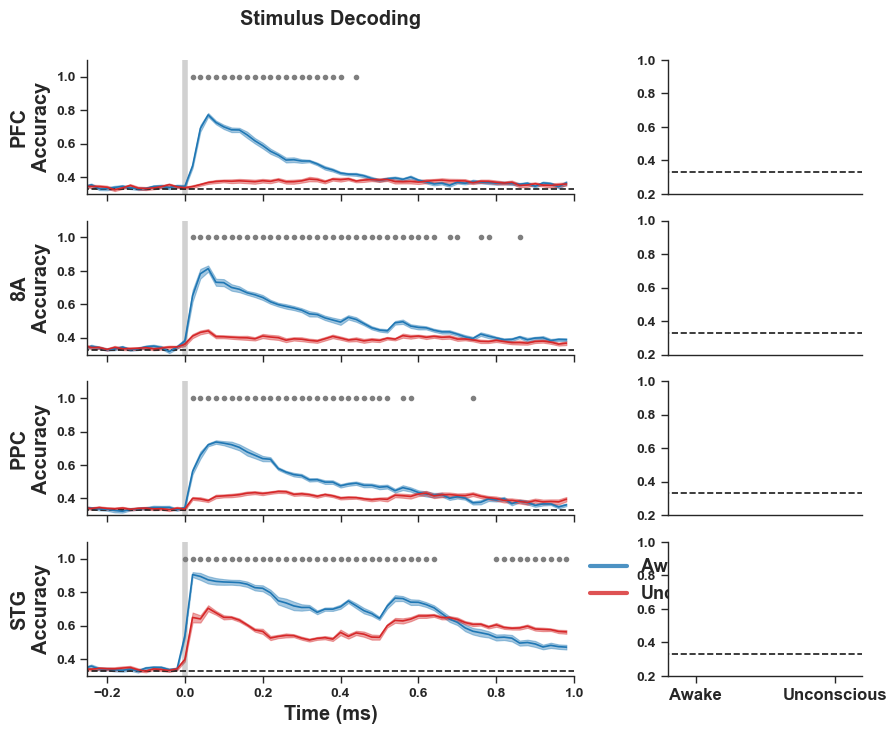

In [13]:
from matplotlib.lines import Line2D 
sns.set_context('paper', font_scale=1.5)

# c = 'po_cpt_t'
phases = ['awake', 'drug2']
fig, ax = plt.subplots(4, 3, figsize=(10, 8), sharex=False,sharey=False,
                      gridspec_kw={'width_ratios':[1,0.005, 0.4]})
# p_colors = ['tab:purple', 'tab:green', 'tab:cyan']


for area in areas_ord:
    j = 0
    i = area_locs[area]

    awake = all_results.loc[:,'awake',area,:][:,cut_s:cut_e]
    drug = all_results.loc[:,'drug2',area,:][:,cut_s:cut_e]

    awake_mean = awake.mean('session').data
    drug_mean = drug.mean('session').data

    awake_std = awake.std('session').data
    drug_std = drug.std('session').data

    awake_err = awake_std / np.sqrt(n_sids)
    drug_err = drug_std / np.sqrt(n_sids)

    a_col = 'tab:blue'
    d_col = 'tab:red'
    ax[i,j].plot(x, awake_mean, label='awake', color=a_col)
    ax[i,j].fill_between(x, awake_mean - awake_err, awake_mean + awake_err, color=a_col, alpha=0.4)
    ax[i,j].plot(x, drug_mean, label='propofol', color=d_col)
    ax[i,j].fill_between(x, drug_mean - drug_err, drug_mean + drug_err, color=d_col, alpha=0.4)


    wilcox_results = np.zeros(T_new)

    for t in range(T_new):
        awake_t = awake[:,t]
        drug_t = drug[:,t]
        s, pval = stats.wilcoxon(awake_t, drug_t)
        wilcox_results[t] = pval

    fdr, pvals = mt.fdrcorrection(wilcox_results)
    ax[i,j].plot(x, fdr , '.', color='tab:gray', markersize=6)

    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].hlines(0.33, -500, 1000, linestyles='dashed')
    ax[i,j].vlines(0, 0, 1.2, linewidth=4, alpha=0.2)
    ax[i,j].set_ylim([0.3, 1.1])
    ax[i,j].set_xlim([start_plot, end_plot])
    ax[i,j].tick_params(axis = 'both', which = 'major', labelsize = 10)


    if i == 3 and j == 0:
#             leg = ax[i,j].legend(prop={'size': 12, 'weight': 'bold'}, bbox_to_anchor=(1,1), 
#                            frameon=False, alpha=0.5)
        line1 = Line2D(range(1),range(1),color=a_col, linewidth=3, alpha=0.8)
        line2 = Line2D(range(1),range(1),color=d_col, linewidth=3, alpha=0.8)

        ax[i,j].legend((line1,line2),('Awake','Unconscious'), frameon=False,
                      prop={'size': 13, 'weight': 'bold'}, bbox_to_anchor=(1,1))

    if i == 0:
#             ax[i,j].set_title(stim_conv[c], fontweight='bold', color=p_colors[j], y=1.2)
        ax[i,j].set_title('Stimulus Decoding', fontweight='bold', y=1.2)
    if i != 3:
        ax[i,j].set_xticklabels([])
    if i == 3:
        ax[i,j].set_xlabel('Time (ms)', fontweight='bold')
    if j == 0:
        ax[i,j].set_ylabel(f'{area_conv[area]}\nAccuracy', fontweight='bold')
    if j != 0:
        ax[i,j].set_yticklabels([])



for i in range(4):
    ax[i,1].set_visible(False)

p = 'tab:purple'
for area in areas_ord:
#         i,j = area_locs[area]
    i = area_locs[area]
    j = 2

    roi_filt = (timepts >= 50) & (timepts <= 250)
    awake = all_results.loc[:,'awake',area,:][:,roi_filt]
    drug = all_results.loc[:,'drug2',area,:][:,roi_filt]
    max_awake = awake.mean('timepts').data
    max_drug = drug.mean('timepts').data


    s=n_sids 
    ax[i,j].scatter(np.zeros(n_sids), max_awake, color=p, s=s)
    ax[i,j].scatter(np.ones(n_sids), max_drug, color=p, s=s)
    for a,d in zip(max_awake, max_drug):
        ax[i,j].plot(np.array([0,1]), [a,d], color=p, linewidth=2, alpha=0.3)

    positions = (0, 1)
    labels = ("Awake", "Unconscious")

    ax[i,j].spines['top'].set_visible(False)
    ax[i,j].spines['right'].set_visible(False)
#         ax[i,j].spines['bottom'].set_visible(False)
    ax[i,j].set_ylim([0.2, 1])
    ax[i,j].set_xlim([-0.2, 1.2])
    ax[i,j].tick_params(axis = 'both', which = 'major', labelsize = 10)

#         if i == 0:
#             ax[i,j].legend(loc='lower left', prop={'weight':'bold', 'size':8}, frameon=False)
    if i != 3:
        ax[i,j].set_xticks([])
        ax[i,j].set_xticklabels([])
    if i == 3:
#         ax[i,j].legend(loc='upper right', prop={'weight':'bold', 'size':10}, 
#                        frameon=False, bbox_to_anchor=(1.9,1.2), markerscale=2)
        ax[i,j].set_xticks(positions)
        ax[i,j].set_xticklabels(labels, fontweight='bold', fontsize=12)
    ax[i,j].hlines(0.33, -1, 2, linestyles='dashed')
# plt.tight_layout()
            

# plt.savefig('spikes_decode.png', dpi=300)
# plt.savefig('spikes_decode.pdf', transparent=True)
